<a href="https://colab.research.google.com/github/mot1122/NLP_100_knock/blob/main/chap7_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章: 単語ベクトル
### 60 単語ベクトルの読み込みと表示
>>
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．

In [1]:
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-01-30 09:15:22--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.92.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.92.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  46.8MB/s    in 34s     

2022-01-30 09:15:57 (46.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [2]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
model['United_States'][:5]

array([-0.03613281, -0.04833984,  0.23535156,  0.17480469, -0.14648438],
      dtype=float32)

### 61 単語の類似度
>>
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [4]:
model.similarity('United_States', 'U.S.')

0.73107743

### 62 類似度の高い単語10件
>>
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [5]:
model.most_similar("United_States",topn=5)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694)]

### 63 加法構成性によるアナロジー
>>
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [6]:
vec=model["Spain"]-model["Madrid"]+model["Athens"]
model.most_similar(positive=["Spain","Athens"],negative=["Madrid"],topn=5)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621)]

### 64 アナロジーデータでの実験
>>
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [7]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2022-01-30 09:18:29--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.107.128, 2607:f8b0:400c:c32::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.107.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2022-01-30 09:18:29 (230 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [8]:
!wc -l questions-words.txt

19558 questions-words.txt


In [9]:
!head -5 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany


In [12]:
with open("questions-words.txt","r") as fr, open("questions-words-added.txt","w") as fw:
  for line in fr:
    words=line.split()
    if words[0]== ":":fw.write(line);cnt=0
    elif cnt<=20:
      ans,cos=model.most_similar(positive=[words[1],words[2]],negative=[words[0]],topn=1)[0]
      fw.write(" ".join(words+[ans,str(cos),"\n"]))
      cnt+=1

In [13]:
!wc -l questions-words-added.txt

308 questions-words-added.txt


In [14]:
 !head -5 questions-words-added.txt

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.6351870894432068 
Athens Greece Bangkok Thailand Thailand 0.7137669324874878 
Athens Greece Beijing China China 0.7235777974128723 
Athens Greece Berlin Germany Germany 0.6734622120857239 


### 65 アナロジータスクでの正解率
>>
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [22]:
flag=True
sem_cnt,sem_corr,syn_cnt,syn_corr=0,0,0,0
with open("questions-words-added.txt","r") as f:
  for line in f:
    words=line.split()
    if words[0]==":":
      if words[1].startswith("gram") :flag=False
      else:flag=True
    else:
      if flag:
        sem_cnt+=1
        if words[3]==words[4]:sem_corr+=1
      else:
        syn_cnt+=1
        if words[3]==words[4]:syn_corr+=1
print(f"semantic accuracy;{sem_corr/sem_cnt}")
print(f"syntactic accuracy:{syn_corr/syn_cnt}")

semantic accuracy;0.7619047619047619
syntactic accuracy:0.6878306878306878


### 66 WordSimilarity-353での評価
>>
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ． 

In [23]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2022-01-30 09:30:03--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2022-01-30 09:30:03--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2022-01-30 09:30:03 (982 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  

In [24]:
!head -5 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46


In [25]:
human,w2v=[],[]
with open("combined.csv","r") as f:
  next(f)
  for line in f:
    w1,w2,v=line.split(",")
    human.append(v)
    w2v.append(model.similarity(w1,w2))

In [26]:
import numpy as np
from scipy.stats import spearmanr

In [27]:
correlation,_=spearmanr(human,w2v)

In [28]:
print(f"correlation:{correlation:.3f}")

correlation:0.685


### 67 k-meansクラスタリング
>>
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [29]:
countries=set()
flag=0
with open("questions-words.txt") as f:
  for line in f:
    words=line.split()
    if words[0]== ":":
      if words[1] in ['capital-common-countries', 'capital-world']:flag=1
      elif words[1] in ['currency', 'gram6-nationality-adjective']:flag=2
      else:flag=0
    else:
      if flag==1:countries.add(words[1])
      elif flag==2:countries.add(words[0])
  countries=list(countries)
  countries_vec=[model[country] for country in countries]

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(countries_vec)

KMeans(n_clusters=5)

In [32]:
for i in range(5):
  cluster=np.where(kmeans.labels_==i)[0]
  print(f"cluster:{i}")
  print(" ".join([countries[j] for j in cluster]))

cluster:0
Netherlands Switzerland Europe Spain Sweden Liechtenstein Ireland USA England Austria Finland Portugal Greenland Norway Malta Denmark Italy Germany Belgium France Cyprus Greece Canada Iceland
cluster:1
Poland Montenegro Lithuania Turkmenistan Kyrgyzstan Turkey Bulgaria Uzbekistan Croatia Serbia Tajikistan Belarus Estonia Macedonia Ukraine Albania Moldova Slovakia Armenia Kazakhstan Georgia Hungary Slovenia Latvia Romania Russia Azerbaijan
cluster:2
Brazil Jamaica Suriname Venezuela Dominica Mexico Tuvalu Belize Samoa Nicaragua Peru Bahamas Chile Argentina Cuba Colombia Ecuador Honduras Uruguay Guyana
cluster:3
Libya Mozambique Tunisia Namibia Zambia Botswana Niger Burundi Sudan Mali Kenya Rwanda Madagascar Guinea Nigeria Gambia Algeria Zimbabwe Malawi Eritrea Gabon Liberia Ghana Angola Senegal Uganda Mauritania Somalia
cluster:4
Morocco Cambodia Vietnam China Pakistan Malaysia Philippines Thailand Iraq Taiwan Israel Iran Bhutan Korea Laos Jordan Afghanistan Oman India Indones

### 68 Ward法によるクラスタリング
>>
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [33]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage

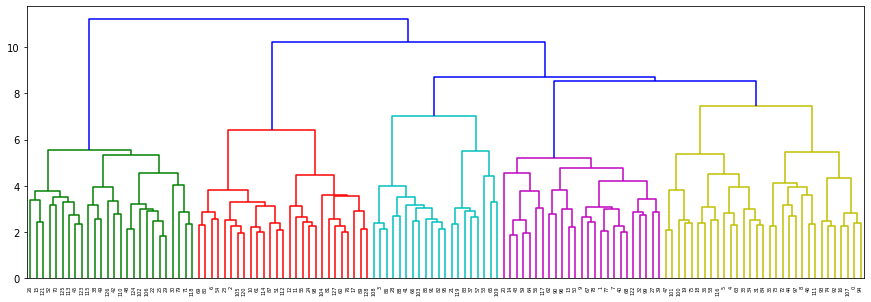

In [34]:
plt.figure(figsize=(15,5))
Z=linkage(countries_vec,method="ward")
dendrogram(Z)
plt.show()

### 69 t-SNEによる可視化
>>
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [35]:
!pip install bhtsne

     |████████████████████████████████| 86 kB 2.9 MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp37-cp37m-linux_x86_64.whl size=214506 sha256=75ddc6f3236ffe96e3484a70edb3939b78c4c384bce59243324e777f39c9c4cf
  Stored in directory: /root/.cache/pip/wheels/e4/4c/71/26b7b0736d179d6bfe9d753629955515bf7ba7c1c8a8d98cb4
Successfully built bhtsne


In [36]:
import bhtsne

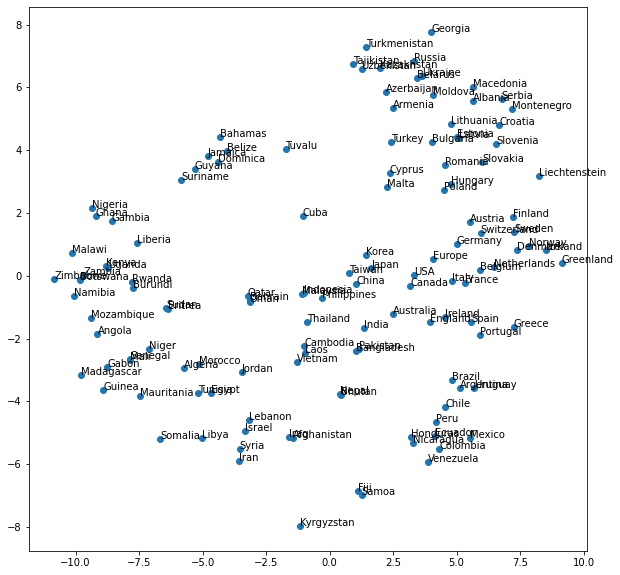

In [37]:
embedded=bhtsne.tsne(np.array(countries_vec).astype(np.float64),dimensions=2,rand_seed=123)
plt.figure(figsize=(10,10))
plt.scatter(np.array(embedded).T[0],np.array(embedded).T[1])
for (x,y),name in zip(embedded,countries):
  plt.annotate(name,(x,y))
plt.show()